<h1 align='center'>Getting started with Tensorflow and Object detection</h1>

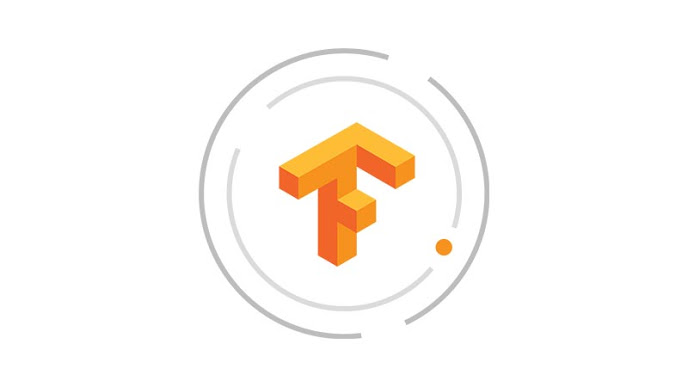

# Table of Contents

1. <a href='#1'>What is Tensorflow?</a>
2. <a href='#2'>Why Tensorflow?</a>
2. <a href='#3'>What are State Machines?</a>
4. <a href='#5'>Data flow programming</a>
5. <a href='#6'>Thinking/Model Defining/Constructing using tensorflow</a>
6. <a href='#7'>keras implementation</a>
7. <a href='#8'>Thinking interms of keras to model a problem</a>
8. <a href='#9'>Object detection using Tensorflow</a>
15. <a href='#0'>References</a>

<a id='1'></a>
# What is Tensorflow?

* TensorFlow™ is an open source software library for high performance numerical computation. 
* Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices. 
* Originally developed by researchers and engineers from the Google Brain team within Google’s AI organization, it comes with strong support for machine learning and deep learning and the flexible numerical computation core is used across many other scientific domains.

* TensorFlow, at its heart, is a library for dataflow programming. It leverages various optimization techniques to make the calculation of mathematical expressions easier and more performant.


* Some of the key features of TensorFlow are:

    * Efficiently works with mathematical expressions involving multi-dimensional arrays
    * Good support of deep neural networks and machine learning concepts
    * GPU/CPU computing where the same code can be executed on both architectures
    * High scalability of computation across machines and huge data sets


* Together, these features make TensorFlow the perfect framework for machine intelligence at a production scale.

<a id='2'></a>
# Why Tensorflow?

* TensorFlow is an up and coming library that is backed by Google and that is quickly spawning very interesting projects. 
* While it’s great to have access to pre-trained models with APIs such as those offered by Clarifai and Google, it’s important, as you progress in machine learning, to be able to dig deeper and train your own data locally. 
* In addition, it’s important to find a community of programmers, data scientists, and mathematicians who are able to gather together around a project to create a vibrant ecosystem.


* A group that is particularly interesting to me is the one creating the Magenta project, powered by TensorFlow. 
* <a href="https://magenta.tensorflow.org/">Magenta</a> is a library that is using machine learning to create compelling art and music. 
* <a href="https://magenta.tensorflow.org/assets/sketch_rnn_demo/index.html">Try drawing with a machine:</a>

<img src='https://developer.telerik.com/wp-content/uploads/2017/09/magenta-tensorflow-1.gif'>

* Or, listen to music generated by Magenta. If you think decent music can’t be machine generated, think again – the <a href='http://www.aiva.ai/'>samples</a> on this web site are quite moving – composed by machines and performed by humans.

<a id='3'></a>
# Installing Tensorflow

* Now that you know more about TensorFlow, it’s time to get started and install the library. 
* Here, it’s good to know that TensorFlow provides APIs for Python, C++, Haskell, Java, Go, Rust.
* It’s best to check the <a href='https://www.tensorflow.org/install/'>official installation instructions</a>.

* For installing using Python pip, use the command:
        # pip install tensorflow

* Now that you have gone through the installation process, it’s time to double check that you have installed TensorFlow correctly by importing it into your workspace under the alias tf:

In [1]:
import tensorflow as tf

In [2]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


* If the system outputs the following, then you are ready to begin writing TensorFlow programs:
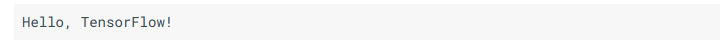

* If the system outputs an error message instead of a greeting, see <a href='https://www.tensorflow.org/install/install_linux#common_installation_problems'>Common installation problems</a>.

<a id=''></a>
# Object Detection using Tensorflow

* Welcome to the object detection inference walkthrough!  This section will walk you step by step through the process of using a pre-trained model to detect objects in an image. 
* Make sure to follow the [installation instructions](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md) before you start.

# Imports

In [1]:
import os
home_path = os.getcwd()

In [2]:
from distutils.version import StrictVersion
import numpy as np
import six.moves.urllib as urllib
import sys
# import tarfile
import tensorflow as tf
# import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

os.chdir( home_path + '/models/research/' )
# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')


## Env setup

In [3]:
# This is needed to display the images.
%matplotlib inline

## Object detection imports
Here are the imports from the object detection module.

In [4]:
os.chdir(home_path + '/models/research/object_detection/')
from utils import label_map_util
from utils import visualization_utils as vis_util

/home/jarvis/Google_Drive/Meetup_files/Getting_started_with_tensorflow_and_real_time_object_detection_15sep18/models/research/object_detection/utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernela

# Model preparation 

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_FROZEN_GRAPH` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

In [6]:
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

NUM_CLASSES = 90

## Load a (frozen) Tensorflow model into memory.

In [7]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [9]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'person'}, 2: {'id': 2, 'name': 'bicycle'}, 3: {'id': 3, 'name': 'car'}, 4: {'id': 4, 'name': 'motorcycle'}, 5: {'id': 5, 'name': 'airplane'}, 6: {'id': 6, 'name': 'bus'}, 7: {'id': 7, 'name': 'train'}, 8: {'id': 8, 'name': 'truck'}, 9: {'id': 9, 'name': 'boat'}, 10: {'id': 10, 'name': 'traffic light'}, 11: {'id': 11, 'name': 'fire hydrant'}, 13: {'id': 13, 'name': 'stop sign'}, 14: {'id': 14, 'name': 'parking meter'}, 15: {'id': 15, 'name': 'bench'}, 16: {'id': 16, 'name': 'bird'}, 17: {'id': 17, 'name': 'cat'}, 18: {'id': 18, 'name': 'dog'}, 19: {'id': 19, 'name': 'horse'}, 20: {'id': 20, 'name': 'sheep'}, 21: {'id': 21, 'name': 'cow'}, 22: {'id': 22, 'name': 'elephant'}, 23: {'id': 23, 'name': 'bear'}, 24: {'id': 24, 'name': 'zebra'}, 25: {'id': 25, 'name': 'giraffe'}, 27: {'id': 27, 'name': 'backpack'}, 28: {'id': 28, 'name': 'umbrella'}, 31: {'id': 31, 'name': 'handbag'}, 32: {'id': 32, 'name': 'tie'}, 33: {'id': 33, 'name': 'suitcase'}, 34: {'id': 34, 'name'

## Helper code

In [14]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [15]:
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [16]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

In [17]:
def detect(image_path):
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)

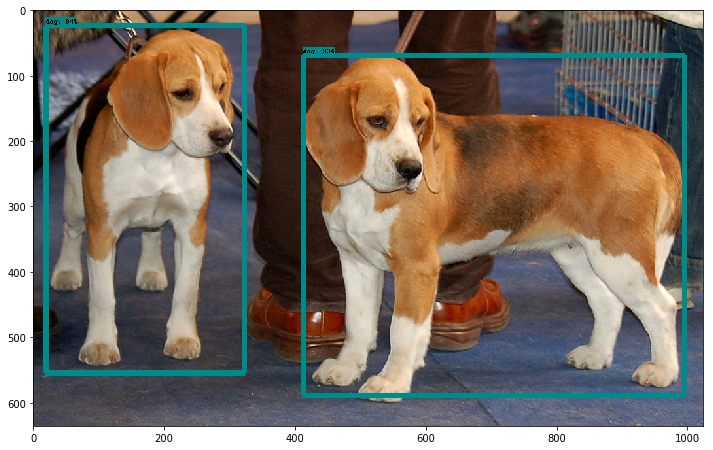

In [18]:
os.chdir(home_path)
detect('test_images/image1.jpg')

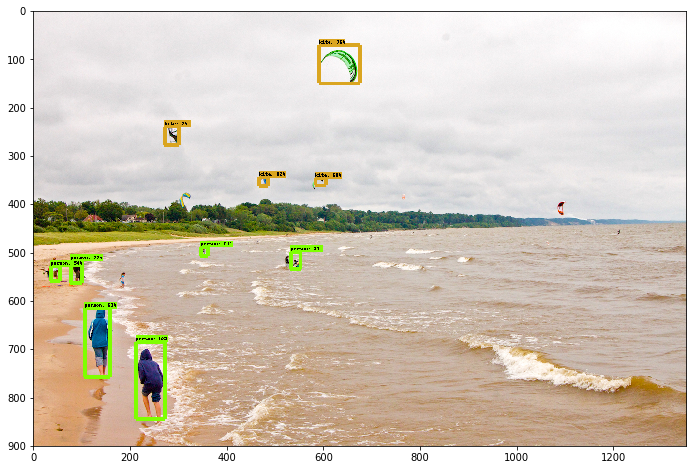

In [19]:
detect('test_images/image2.jpg')

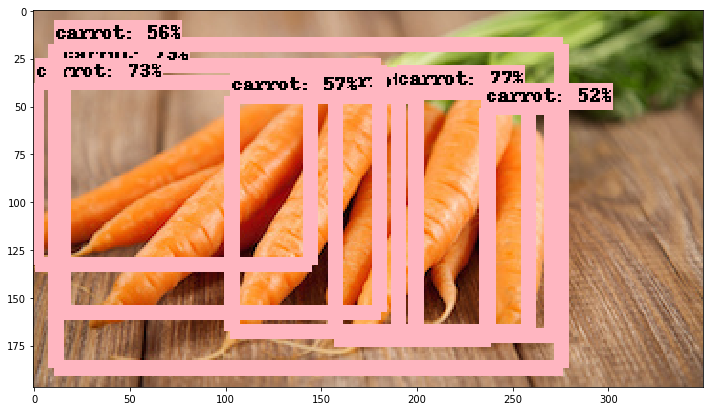

In [16]:
detect('test_images/image3.jpg')

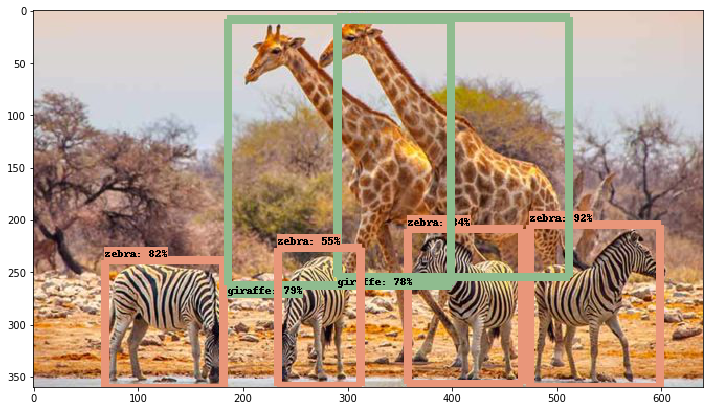

In [17]:
detect('test_images/image5.jpg')

* Now try giving any image from internet, and test how well the model performs

<a id='0'></a>
# References

* https://www.tensorflow.org/
* https://bytegain.com/blog/getting-started-with-tensorflow-guide
* https://www.kdnuggets.com/2017/12/getting-started-tensorflow.html
* https://www.datacamp.com/community/tutorials/tensorflow-tutorial
* https://github.com/tensorflow/models/tree/master/research/object_detection